# TITLE

This notebook was prepared by: 

Sahil Nisar (sn3028@nyu.edu)

Suniya Raza (sr5748@nyu.edu)

Vinicius Moreira (vgm236@nyu.edu)

Graduate School of Arts and Science (GSAS) at New York University (NYU)

2022

PLACEHOLDER FOR SUMMARY

In [20]:
#Packages

import fredapi as fa
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import math
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pandas.plotting import autocorrelation_plot

%matplotlib inline

## 1. Introduction 

## 2. Literature Review

## 3. Forecasting methods

#### 3.1 Univariate Models

**Trailing 3-period average**: 

This simple estimator plays the role of a naïve benchmark. It is an average of three periods, which can be 3-months or 3-quarters, depending on the variable used in our analysis.

\begin{align*}
  \hat{\mu}_{t+1} &= \frac{1}{T}\sum^{t=3}_{t=1} {\hat\mu_t}\\
  &\text{where } \hat{\mu}_{t} \text{is the independent variable}\\
\end{align*}

**Exponential Smoothing**: 

A weighted average of lagged values, with weights decaying exponentially the longer the lag. Exponential smoothing takes into account all past data, whereas moving average only takes into account $k$ past data points.


$$ X_{t+1} = \alpha X_{t} + \alpha (1- \alpha) X_{t-1} + \alpha (1- \alpha)^2 X_{t-2} + {...} $$


where $0 \le \alpha \le 1 $ is the smoothing parameter. You choose how many lags to use. We will use four lags here.

**ARIMA**: 

A stochastic process $ \{X_t\} $ is called an *autoregressive moving
average process*, or ARMA($ p,q $), if it can be written as


<a id='equation-arma'></a>
$$
X_t = \phi_1 X_{t-1} + \cdots + \phi_p X_{t-p} +
    \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q} \tag{28.5}
$$

where $ \{ \epsilon_t \} $ is white noise.

In what follows we **always assume** that the roots of the polynomial $ \phi(z) $ lie outside the unit circle in the complex plane.

This condition is sufficient to guarantee that the ARMA($ p,q $) process is covariance stationary.

In fact, it implies that the process falls within the class of general linear processes.

We define an ARIMA(p, d, q) model as the mixture of an AR(p) and MA(q) model with differencing (to help make the process stationary)

#### 3.2 Linear Regression and Machine Learning Models

**Simple Linear Regression (OLS):**

he most common technique to estimate a linear relationship between variables is Ordinary Least Squares (OLS). OLS model is solved by finding the parameters that minimize the sum of squared residuals.

The model can be defined, in the matrix form, as:

$$
y = X\beta + u
$$

To solve for the unknown parameter $ \beta $, we want to minimize
the sum of squared residuals

$$
\underset{\hat{\beta}}{\min} \hat{u}'\hat{u}
$$

Rearranging the first equation and substituting into the second
equation, we can write

$$
\underset{\hat{\beta}}{\min} \ (Y - X\hat{\beta})' (Y - X\hat{\beta})
$$

Solving this optimization problem gives the solution for the
$ \hat{\beta} $ coefficients

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

**Ridge / Lasso / Elastic Net:**

These models are very closely related to traditional OLS, but they focus on regularization of parameters to avoid overfitting.

The Lasso model generates predictions using but optimizes over a slightly different loss function:

$$
\underset{\hat{\beta}}{\min} \ (Y - X\hat{\beta})' (Y - X\hat{\beta}) + \alpha\hat{\beta}
$$

where $ \alpha $ is the regularization parameter. The additional term penalizes large coefficients and in practice, effectively sets coefficients to zero for features that are not informative about the target.


Ridge regressions places a particular form of constraint on the parameters $\beta$, which is chosen to minimize the penalized sum of squares:

$$
\underset{\hat{\beta}}{\min} \ (Y - X\hat{\beta})' (Y - X\hat{\beta}) + \lambda\hat{\beta}'\hat{\beta}
$$

This means that if the $\beta$ take on large values, the optimization function is penalized, but not zero (only reducing the impact of "irrelevant" features of the model).

The elastic net algorithm uses a weighted combination of Ridge and Lasso forms of regularization. 

#### 3.3 More Complex Econometric Methods

**TODO: IMPROVE THIS SECTION**

**Dynamic Factor Model:**

In a dynamic factor model, we model a potentially large number of macroeconomic series as being driven by a much smaller number of latent factors, which are estimated through a principal component analysis. 

Principal component analysis is an unsupervised algorithm, based on feature correlation, used for dimensionality reduction. The premise is simply to take data of higher dimensions, and reduce to a lower dimension.

Often times, in higher dimensional data, it isn't possible to create visual representations of relationships between variables. Through applying PCA, it then becomes possible to reduce the dimensions of the data and display variable relationships. This tool also allows easier visualization and noise filtering, among other applications.

The PCA must be used when three conditions apply:

1. Reduce the number of variables
2. Ensure that each variable is independent of one another
3. Assume that the interpretation of the independent variables is less important

How does a PCA work?

a. Calculate a matrix that summarizes how the variables are related one another (the covariance matrix).

b. Then separate it between direction (eigenvectors) and magnitude (eigenvalues)

c. By projecting the data into a smaller space, we reduce dimension, but keep the original variables in our model

Mathematically, the first principal component is the direction in space along which projections have the largest variance. The second principal component is the direction which maximizes variance among all directions orthogonal to the first. The k-th component is the variance-maximizing direction orthogonal to the previous k-1 components.

With those principal components, we use them as explanatory variables in an OLS.

This is a state space model to try and explain the GDP data we observe by using only one unobserved factor, extracted from a series of monthly data.

Define our state space model as:

\begin{align*}
  \lambda_{t} &= A \lambda_{t-1} + \eta_t \\
  p_{i, t} &= G_i \lambda_t + \varepsilon_{i, t} \\
  \eta_t &\sim N(0, I) \\
  \varepsilon_t &\sim N(0, \Sigma)
\end{align*}

Note: If we stack our $p_{i, t}$ values, we wind up with

$$P_t = G \lambda_t + \varepsilon_t$$

where $G \equiv \begin{bmatrix} G_1 \\ G_2 \\ \vdots \\ G_I \end{bmatrix}$, $\varepsilon_t \equiv \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_I \end{bmatrix}$

**Vector autoregressions (VARs):**

Description

#### 3.4 Nonlinear Algorithms


**Random Forest:**

Description

**Gradient Boosted Decision Trees:**

Description

**K-Nearest Neighbors:**

Description

**Support Vector Regression:**

Description

#### 3.5 Neural Networks

**Dense:**

Description

**LSTM:**

Description

## 4. Applications to US GDP growth

Explain what we do -- TODO

#### 4.1 Data

In [2]:
# Access Fred
fred = fa.Fred(api_key='b64520b0097cdfbc83e22960ad3fcdd8 ')

# Getting series (quartery)
gdp = fred.get_series('GDP').rename("GDP")

# Getting series (monthly)
payroll = fred.get_series('PAYEMS').rename("payroll")
job_openings = fred.get_series('JTSJOL').rename("job_openings")
quits = fred.get_series('JTSQUR').rename("quits")
ip = fred.get_series('INDPRO').rename("ip")
vehicle_sales = fred.get_series('TOTALSA').rename("vehicle_sales")
retail = fred.get_series('RRSFS').rename("retail")
wholesale_inventories = fred.get_series('WHLSLRIMSA').rename("wholesale_inventories")
consumer_sentiment = fred.get_series('UMCSENT').rename("consumer_sentiment")
construction_spending = fred.get_series('TTLCONS').rename("construction_spending")
new_orders = fred.get_series('DGORDER').rename("new_orders")
housing_starts = fred.get_series('HOUST').rename("housing_starts")

# List of data
list_monthly = [payroll, job_openings, ip, vehicle_sales, quits, retail, wholesale_inventories, consumer_sentiment, construction_spending, new_orders, housing_starts]

In [3]:
# Monthly DataFrame
monthly = pd.concat(list_monthly, axis=1).dropna()

# Normalized DataFrame
normalized_monthly=np.log(monthly).diff()*100

normalized_monthly.head()

,payroll,job_openings,ip,vehicle_sales,quits,retail,wholesale_inventories,consumer_sentiment,construction_spending,new_orders,housing_starts
2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,-0.008289,2.829098,-0.576824,8.448075,8.701138,0.525976,-0.144352,-3.832680,0.364454,-6.347509,4.342956
2001-02-01,0.068553,-2.652367,-0.679159,0.980897,-4.255961,-0.249068,0.094208,-4.425979,-0.102203,1.802294,1.550419
2001-03-01,-0.031634,-6.798438,-0.245548,-3.296187,0.000000,-0.893534,0.004854,0.988476,1.755538,1.066537,-2.177380
2001-04-01,-0.214170,-3.135588,-0.312122,-2.204075,4.255961,1.393563,0.460673,-3.446700,1.716347,-5.853238,3.643503


In [4]:
#Adjusting index
normalized_monthly = normalized_monthly.reset_index()
normalized_monthly.set_index('index')

#Turning into quarterly
quarterly = normalized_monthly.groupby(pd.PeriodIndex(normalized_monthly['index'], freq='Q')).mean().reset_index()

# Adjust the gdp data series
df_gdp = pd.DataFrame(gdp).loc[(pd.DataFrame(gdp).index >= '2000-10-01') & (pd.DataFrame(gdp).index <= '2021-10-01')].reset_index().rename(columns={"index": "old_index"})
df_gdp['GDP'] = np.log(df_gdp['GDP']).diff()*100

# Add on a single dataframe
quarterly_all = pd.concat([df_gdp, quarterly], axis=1).drop('old_index', axis=1).set_index('index')
quarterly_all = quarterly_all.dropna()[:-1]

# Finally, we've got the data
quarterly_all

,GDP,payroll,job_openings,ip,vehicle_sales,quits,retail,wholesale_inventories,consumer_sentiment,construction_spending,new_orders,housing_starts
index,,,,,,,,,,,,
2001Q1,0.329925,0.009543,-2.207236,-0.500511,2.044262,1.481725,-0.205542,-0.015097,-2.423394,0.672596,-1.159559,1.238665
2001Q2,1.222357,-0.112685,-2.932212,-0.486808,0.414847,-1.481725,0.171549,0.015636,0.398339,1.095764,-1.089457,0.950674
2001Q3,-0.009247,-0.133298,-2.293757,-0.412019,-2.166557,-1.550667,-0.592279,-0.487928,-4.133730,-0.721291,-2.395150,-1.542906
2001Q4,0.587485,-0.200189,-3.393049,-0.315040,0.203067,-1.626339,1.039012,-0.793410,2.736980,0.485141,0.239002,0.127796
2002Q1,1.147515,-0.067508,-0.594519,0.478147,1.275027,-1.709776,-0.140780,-0.371882,2.494388,-0.202176,0.510080,1.537136
...,...,...,...,...,...,...,...,...,...,...,...,...
2020Q3,8.184244,0.948176,2.421341,1.585079,7.227744,4.886782,1.044554,0.394046,0.967471,0.558379,4.300963,4.293566
2020Q4,1.591087,0.202960,2.204496,0.922760,0.115547,2.900379,-0.948068,0.525904,0.124147,1.010769,1.546522,4.574551
2021Q1,2.576810,0.449365,6.689897,0.295912,2.663042,2.668090,4.530584,1.142129,1.691184,0.968967,1.648741,1.260241


#### 4.2 Trailing 3-period average (application):

Now, we move to estimate the benchmark of a simple trailing 3-period average predicting future GDP.

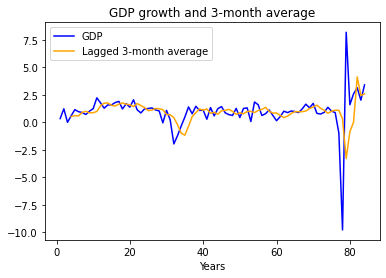

In [5]:
# Define the three month trailing average
df_gdp["3m_avg"] = (df_gdp["GDP"].shift(1).rolling(3).sum()/3)

### in plot method we set the label and color of the curve.
df_gdp['GDP'].plot(label='GDP', color='blue')

df_gdp['3m_avg'].plot(label='Lagged 3-month average', color='orange')
  
# adding title to the plot
plt.title('GDP growth and 3-month average')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [6]:
trailing_rmse = math.sqrt(sklearn.metrics.mean_squared_error(df_gdp['GDP'][40:], df_gdp['3m_avg'][40:]))

print(f"Out-of-Sample RMSE is : {trailing_rmse}")

Out-of-Sample RMSE is : 2.4083075618421033


#### 4.3 Exponential Smoothing (application):

Explain briefly

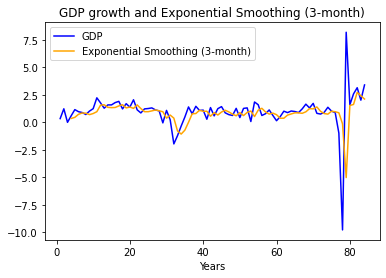

In [7]:
# Define the three month trailing average
df_gdp["exponential"] = 0.5*df_gdp["GDP"].shift(1) + (1-0.5)*0.5*df_gdp["GDP"].shift(2) + (1-0.5)*(0.5**2)*df_gdp["GDP"].shift(3)

### in plot method we set the label and color of the curve.
df_gdp['GDP'].plot(label='GDP', color='blue')

df_gdp["exponential"].plot(label='Exponential Smoothing (3-month)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and Exponential Smoothing (3-month)')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [8]:
exponential_rmse = math.sqrt(sklearn.metrics.mean_squared_error(df_gdp['GDP'][40:], df_gdp["exponential"][40:]))

print(f"Out-of-Sample RMSE is : {exponential_rmse}")

Out-of-Sample RMSE is : 2.509512751787306


#### 4.4 ARIMA models (application):

explain TODO

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

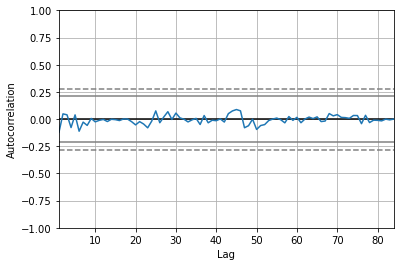

In [24]:
autocorrelation_plot(df_gdp["GDP"][1:])

#### 4.x Dynamic Factor Model (application):

Placeholder

In [9]:
# Remove the index to run the algorithm
normalized_monthly_adjust = normalized_monthly.set_index('index')
normalized_data = normalized_monthly_adjust.reset_index(drop=True)

# Build and fit dynamic factor model using an EM algorithm
mod = sm.tsa.DynamicFactorMQ(normalized_data, factors=1, factor_orders=3)

res = mod.fit(disp=10)

EM start iterations, llf=-3521.2
EM iteration 10, llf=-3441.6, convergence criterion=3.8808e-05
EM iteration 20, llf=-3440.9, convergence criterion=1.0511e-05
EM iteration 30, llf=-3440.7, convergence criterion=4.7606e-06
EM iteration 40, llf=-3440.6, convergence criterion=2.7554e-06
EM iteration 50, llf=-3440.5, convergence criterion=1.8448e-06
EM iteration 60, llf=-3440.5, convergence criterion=1.3577e-06
EM iteration 70, llf=-3440.4, convergence criterion=1.0655e-06
EM converged at iteration 74, llf=-3440.4, convergence criterion=9.8011e-07 < tolerance=1e-06


In [10]:
# Summary of the model with factor loadings
res.summary()

Dep. Variable:,"""payroll"", and 10 more",No. Observations:,255
Model:,Dynamic Factor Model,Log Likelihood,-3440.395
,+ 1 factors in 1 blocks,AIC,6954.789
,+ AR(1) idiosyncratic,BIC,7085.816
Date:,"Thu, 28 Apr 2022",HQIC,7007.494
Time:,19:33:07,EM Iterations,74
Sample:,0,,
,- 255,,
Covariance Type:,Not computed,,
Factor loadings:,0,idiosyncratic: AR(1),var.
payroll,-0.43,-0.13,0.31


In [11]:
# Add factor to the dataframe of all series
factor = res.factors["smoothed"].rename({"0": "dfm"}, axis='columns')

normalized_with_factors = pd.concat([normalized_monthly.reset_index(), factor], axis=1).set_index('index')

#Adjusting index
normalized_with_factors = normalized_with_factors.reset_index()
normalized_with_factors.set_index('index')

# Put data on a quarterly basis
quarterly = normalized_with_factors.groupby(pd.PeriodIndex(normalized_with_factors['index'], freq='Q')).mean().reset_index()

# Adjust the gdp data series
df_gdp = pd.DataFrame(gdp).loc[(pd.DataFrame(gdp).index >= '2000-10-01') & (pd.DataFrame(gdp).index <= '2021-10-01')].reset_index().rename(columns={"index": "old_index"})

df_gdp['GDP'] = np.log(df_gdp['GDP']).diff()*100

# Add on a single dataframe
quarterly_all_factor = pd.concat([df_gdp, quarterly], axis=1).drop('old_index', axis=1).set_index('index')
quarterly_all_factor = quarterly_all_factor.dropna()[:-1]

# Finally, we've got the data
quarterly_all_factor.tail()


,GDP,level_0,payroll,job_openings,ip,vehicle_sales,quits,retail,wholesale_inventories,consumer_sentiment,construction_spending,new_orders,housing_starts,dfm
index,,,,,,,,,,,,,,
2020Q3,8.184244,236.0,0.948176,2.421341,1.585079,7.227744,4.886782,1.044554,0.394046,0.967471,0.558379,4.300963,4.293566,-1.992725
2020Q4,1.591087,239.0,0.202960,2.204496,0.922760,0.115547,2.900379,-0.948068,0.525904,0.124147,1.010769,1.546522,4.574551,-0.630373
2021Q1,2.576810,242.0,0.449365,6.689897,0.295912,2.663042,2.668090,4.530584,1.142129,1.691184,0.968967,1.648741,1.260241,-1.704796
2021Q2,3.138917,245.0,0.291137,4.998801,0.437010,-4.320419,2.470266,-0.603363,1.187594,0.234743,0.654577,1.077530,-1.340610,-0.341317
2021Q3,2.008565,248.0,0.370847,2.668090,-0.202931,-7.612052,1.169711,-0.313698,1.095171,-5.360014,0.689639,0.473982,-2.225127,0.239555


In [12]:
# Regression of factor model
quarterly_all_factor = sm.add_constant(quarterly_all_factor)
regression_factor = sm.OLS(quarterly_all_factor['GDP'],quarterly_all_factor[['dfm', 'const']], missing='drop').fit()
regression_factor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     67.52
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           2.80e-12
Time:                        19:33:07   Log-Likelihood:                -131.72
No. Observations:                  83   AIC:                             267.4
Df Residuals:                      81   BIC:                             272.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dfm           -1.5801      0.192     -8.217      0.000      -1.963      -1.198
const          0.9906      0.131      7.534      0.000       0.729       1.252
==============================================================================
Omnibus:                       83.829   Durbin-Watson:                   2.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1678.885
Skew:                          -2.724   Prob(JB):                         0.00
Kurtosis:                      24.349   Cond. No.                         1.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Merge with predict series
quarterly_predict = quarterly_all_factor.reset_index()
regression_fit = pd.DataFrame(regression_factor.predict(), columns = ['Predict'])
quarterly_predict = pd.concat([quarterly_predict, regression_fit], axis=1).set_index('index')
quarterly_predict.head()

,const,GDP,level_0,payroll,job_openings,ip,vehicle_sales,quits,retail,wholesale_inventories,consumer_sentiment,construction_spending,new_orders,housing_starts,dfm,Predict
index,,,,,,,,,,,,,,,,
2001Q1,1.0,0.329925,2.0,0.009543,-2.207236,-0.500511,2.044262,1.481725,-0.205542,-0.015097,-2.423394,0.672596,-1.159559,1.238665,0.495002,0.208416
2001Q2,1.0,1.222357,5.0,-0.112685,-2.932212,-0.486808,0.414847,-1.481725,0.171549,0.015636,0.398339,1.095764,-1.089457,0.950674,0.479490,0.232927
2001Q3,1.0,-0.009247,8.0,-0.133298,-2.293757,-0.412019,-2.166557,-1.550667,-0.592279,-0.487928,-4.133730,-0.721291,-2.395150,-1.542906,0.877038,-0.395257
2001Q4,1.0,0.587485,11.0,-0.200189,-3.393049,-0.315040,0.203067,-1.626339,1.039012,-0.793410,2.736980,0.485141,0.239002,0.127796,0.308816,0.502618
2002Q1,1.0,1.147515,14.0,-0.067508,-0.594519,0.478147,1.275027,-1.709776,-0.140780,-0.371882,2.494388,-0.202176,0.510080,1.537136,-0.032557,1.042037


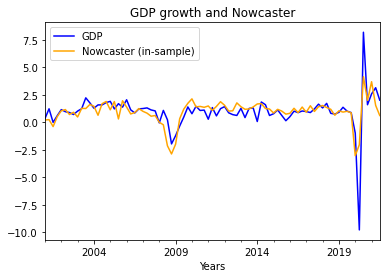

In [14]:
### in plot method we set the label and color of the curve.
quarterly_predict['GDP'].plot(label='GDP', color='blue')
quarterly_predict['Predict'].plot(label='Nowcaster (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and Nowcaster')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [15]:
# Now, we run with the train sample from 2000 to 2010
quarterly_restrict = quarterly_all_factor[:-43]
regression_factor_train = sm.OLS(quarterly_restrict['GDP'], quarterly_restrict[['dfm', 'const']]).fit()
regression_factor_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     57.32
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           4.21e-09
Time:                        19:33:07   Log-Likelihood:                -29.772
No. Observations:                  40   AIC:                             63.54
Df Residuals:                      38   BIC:                             66.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dfm           -0.9299      0.123     -7.571      0.000      -1.179      -0.681
const          1.1081      0.085     13.041      0.000       0.936       1.280
==============================================================================
Omnibus:                        0.132   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.316
Skew:                           0.098   Prob(JB):                        0.854
Kurtosis:                       2.611   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

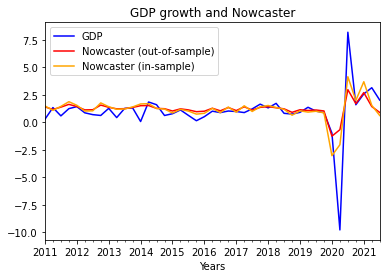

In [16]:
### in plot method we set the label and color of the curve.
quarterly_predict['GDP'][40:].plot(label='GDP', color='blue')

out_of_sample_teste = -0.93*quarterly_predict['dfm'] + 1.1081
out_of_sample_teste[40:].plot(label='Nowcaster (out-of-sample)', color='red')

quarterly_predict['Predict'][40:].plot(label='Nowcaster (in-sample)', color='orange')
  
# adding title to the plot
plt.title('GDP growth and Nowcaster')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [17]:
dfm_rmse_out_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_predict['GDP'][40:], out_of_sample_teste[40:]))
dfm_rmse_in_sample = math.sqrt(sklearn.metrics.mean_squared_error(quarterly_predict['GDP'][40:], quarterly_predict['Predict'][40:]))

print(f"Out-of-Sample RMSE is : {dfm_rmse_out_sample}")
print(f"In-Sample RMSE is : {dfm_rmse_in_sample}")

Out-of-Sample RMSE is : 1.6950033328081802
In-Sample RMSE is : 1.4952381061359965


## 5. Applications to Brazil industrial production growth

## 6. Conclusion

## 7. References

References (make this more professional)

https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

https://python-advanced.quantecon.org/arma.html

https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/

Towards Science: A One-Stop Shop for Principal Component Analysis (https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

In Depth: Principal Component Analysis (https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

Advanced Data Analysis from an Elementary Point of View (https://www.stat.cmu.edu/~cshalizi/uADA/15/lectures/17.pdf).

Applications of Principal Component Analysis (PCA) (https://iq.opengenus.org/applications-of-pca/).

https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788